# Tasks  
***
#### Applied statistics module with lecturer Dr Ian McLoughlin

#### Semester 4, Higher Diploma in Science in Data Analytics at ATU 2023/24 


##### Submission due date: 20/12/2023 
##### Author: Shane Keenan 
##### Status: Ongoing
***

Import all required python packages needed 

In [12]:
# numerical package for arrays and matrices
import numpy as np 
# package for data manipulation and analysis
import pandas as pd 
# plotting library
import matplotlib.pyplot as plt 
# statistical graphics package

from scipy.stats import norm
from scipy import stats


### Task 1: Permutations and Combinations
***
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.



***




***
End of Task   1  
***


### Task 2:  numpy's Normal Distribution
***
In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

***


generate normal distributions 

In [43]:
mean = 10.0
std = 3.0 

# generate 100,000 x values from 0 to 20 
x_values = np.linspace(0, 20, 100000)
# using numpy.random.normal function generate normal distribution 
y_values_norm = np.random.normal(mean, std, 100000)
# scipy.stats part of the SciPy library does a nice job of generating the probability density function for us. 
y_values_pdf = norm.pdf(x_values, mean, std)

plot histogram

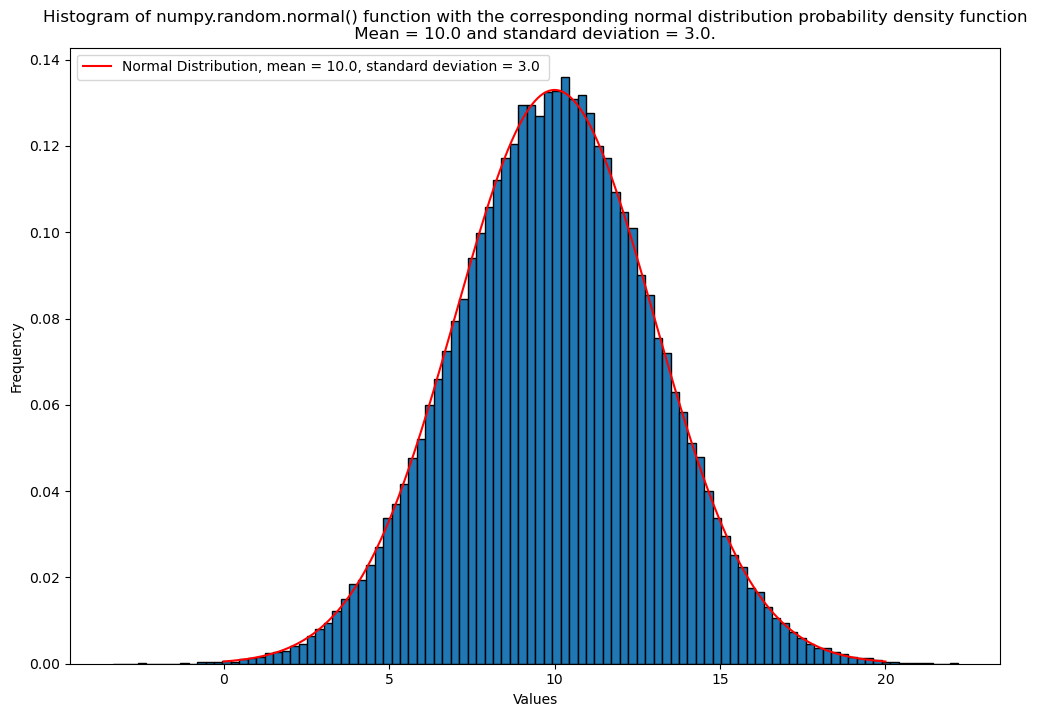

In [49]:
bins = 100
fig, ax = plt.subplots(figsize=(12, 8))
# plot the normal distribution probability density function in red
ax.plot(x_values, y_values_pdf, 'r', label=f'Normal Distribution, mean = {mean}, standard deviation = {std} ')
#plot histogram of numpy.random.normal function valves for and plot the corresponding normal distribution probability density function on top of it.
ax.hist(y_values_norm, bins = bins, density=True, label='', edgecolor='black')
ax.set_title('Histogram of numpy.random.normal() function with the corresponding normal distribution probability density function\n Mean = 10.0 and standard deviation = 3.0. ')
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.legend(loc='upper left')
plt.show()

***

End of Task 2

***

### Task 3: t-Test Calculation
***

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

***



***
End of task 3

***

### Task 4: ANOVA
***
In this test we will estimate the probability of committing a type II error in specific circumstances.
To begin, create a variable called `no_type_ii` and set it to `0`.

Now use a loop to perform the following test 10,000 times.

1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

Summarize and explain your results.


***

***
End of task 4 
***

# 